In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Student_health.csv')
df.head()

,ID,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2,08-07-2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,3,08-07-2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,4,08-07-2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,5,08-07-2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df  = df.drop(['Timestamp'], axis=1)
df  = df.drop(['Age'], axis=1)
df.head()

,ID,Choose your gender,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,Female,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2,Male,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,3,Male,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,4,Female,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,5,Male,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df2 = df.iloc[:,[0,1,2,3,4]]
df2.head()

,ID,Choose your gender,What is your course?,Your current year of Study,What is your CGPA?
0,1,Female,Engineering,year 1,3.00 - 3.49
1,2,Male,Islamic education,year 2,3.00 - 3.49
2,3,Male,BIT,Year 1,3.00 - 3.49
3,4,Female,Laws,year 3,3.00 - 3.49
4,5,Male,Mathemathics,year 4,3.00 - 3.49


In [6]:
df2.to_csv('Student.csv', index=True) 

In [8]:
df3 = df.iloc[:,[5,6,7,8,9]]
df3.head()

,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,No,Yes,No,Yes,No
1,No,No,Yes,No,No
2,No,Yes,Yes,Yes,No
3,Yes,Yes,No,No,No
4,No,No,No,No,No


In [9]:
df3.to_csv('Stud_info.csv', index=True)

In [102]:
import mysql.connector
from getpass import getpass

In [103]:
username = input("Enter your MySQL username: ")
password = getpass("Enter your MySQL password: ")

Enter your MySQL username: root
Enter your MySQL password: ········


In [104]:
host = "localhost"  # Change this to your MySQL server hostname or IP address
database = "mysql"  # Change this to the name of your data

In [105]:
try:
    # Establish a connection to the MySQL server
    connection = mysql.connector.connect(
        host=host,
        user=username,
        password=password,
    )

    if connection.is_connected():
        print("Connected to the MySQL server")
except mysql.connector.Error as e:
    print(f"Error: {e}")    

Connected to the MySQL server


In [106]:
mycursor = connection.cursor()

In [107]:
mycursor.execute("use mysql")

In [84]:
mycursor.execute("create table Student(ID varchar(20) Not Null,Gender varchar(10) Not Null,Course varchar(50) Not Null,CGPA varchar(50) Not Null, constraint stud_pk primary key(ID))")

In [85]:
mycursor.execute("Create table Stud_info (ID varchar(20) Not Null,Marital_Status varchar(10),Depression varchar(10),Anxiety varchar(10),Panic varchar(10),Treatment varchar(10),Constraint info_pk primary key (ID),Constraint foreign key (ID) references Student(ID))")

# Inserting values

In [61]:
df2  = df2.drop(['Your current year of Study'], axis=1)

In [75]:
df2.head()

,ID,Choose your gender,What is your course?,What is your CGPA?
0,1,Female,Engineering,3.00 - 3.49
1,2,Male,Islamic education,3.00 - 3.49
2,3,Male,BIT,3.00 - 3.49
3,4,Female,Laws,3.00 - 3.49
4,5,Male,Mathemathics,3.00 - 3.49


In [ ]:
df.to_csv('file1.csv')
for i,row in df2.iterrows():
    sql = "insert into mysql.student values (%s,%s,%s,%s)"
    values = (row['ID'],row['Choose your gender'],row['What is your course?'],row['What is your CGPA?'])
    mycursor.execute(sql,values)
    connection.commit()

In [88]:
mycursor.execute("select * from student;")
for x in mycursor:
    print(x)

('1', 'Female', 'Engineering', '3.00 - 3.49')
('10', 'Male', 'Irkhs', '3.50 - 4.00')
('100', 'Female', 'Pendidikan Islam', '3.50 - 4.00')
('101', 'Male', 'Biomedical science', '3.00 - 3.49')
('11', 'Female', 'Psychology', '3.50 - 4.00')
('12', 'Female', 'Engineering', '3.50 - 4.00')
('13', 'Female', 'BCS', '3.00 - 3.49')
('14', 'Male', 'Engineering', '3.00 - 3.49')
('15', 'Female', 'KENMS', '3.50 - 4.00')
('16', 'Male', 'BCS', '3.50 - 4.00')
('17', 'Female', 'Accounting ', '3.00 - 3.49')
('18', 'Female', 'ENM', '3.00 - 3.49')
('19', 'Female', 'BIT', '3.50 - 4.00')
('2', 'Male', 'Islamic education', '3.00 - 3.49')
('20', 'Female', 'Marine science', '3.50 - 4.00')
('21', 'Female', 'Engineering', '3.00 - 3.49')
('22', 'Female', 'KOE', '3.00 - 3.49')
('23', 'Female', 'BCS', '3.50 - 4.00')
('24', 'Female', 'Engineering', '3.00 - 3.49')
('25', 'Female', 'BCS', '3.50 - 4.00')
('26', 'Female', 'Banking Studies', '3.50 - 4.00')
('27', 'Female', 'Engineering', '3.50 - 4.00')
('28', 'Male', 'Engi

In [94]:
temp = df2.iloc[:,0]
df3.insert(0, 'ID', temp)

In [95]:
df3.head()

,ID,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,No,Yes,No,Yes,No
1,2,No,No,Yes,No,No
2,3,No,Yes,Yes,Yes,No
3,4,Yes,Yes,No,No,No
4,5,No,No,No,No,No


In [98]:
 for i,row in df3.iterrows():
    sql = "insert into mysql.stud_info values (%s,%s,%s,%s,%s,%s)"
    values = (row['ID'],row['Marital status'],row['Do you have Depression?'],row['Do you have Anxiety?'],row['Do you have Panic attack?'],row['Did you seek any specialist for a treatment?'])
    mycursor.execute(sql,values)
    connection.commit()

In [99]:
mycursor.execute("select * from stud_info;")
for x in mycursor:
    print(x)

('1', 'No', 'Yes', 'No', 'Yes', 'No')
('10', 'No', 'No', 'Yes', 'Yes', 'No')
('100', 'No', 'No', 'No', 'No', 'No')
('101', 'No', 'No', 'No', 'No', 'No')
('11', 'No', 'No', 'No', 'No', 'No')
('12', 'Yes', 'Yes', 'No', 'No', 'No')
('13', 'No', 'Yes', 'No', 'No', 'No')
('14', 'No', 'No', 'No', 'No', 'No')
('15', 'No', 'No', 'Yes', 'No', 'No')
('16', 'No', 'No', 'No', 'No', 'No')
('17', 'No', 'No', 'No', 'No', 'No')
('18', 'Yes', 'Yes', 'Yes', 'Yes', 'No')
('19', 'No', 'No', 'Yes', 'No', 'No')
('2', 'No', 'No', 'Yes', 'No', 'No')
('20', 'Yes', 'Yes', 'Yes', 'Yes', 'No')
('21', 'No', 'No', 'No', 'Yes', 'No')
('22', 'No', 'No', 'No', 'No', 'No')
('23', 'No', 'No', 'No', 'No', 'No')
('24', 'No', 'No', 'No', 'No', 'No')
('25', 'No', 'Yes', 'Yes', 'Yes', 'No')
('26', 'No', 'No', 'No', 'No', 'No')
('27', 'No', 'No', 'No', 'No', 'No')
('28', 'Yes', 'Yes', 'Yes', 'No', 'No')
('29', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes')
('3', 'No', 'Yes', 'Yes', 'Yes', 'No')
('30', 'No', 'No', 'No', 'No', 'No')
('31',

In [110]:
sql = "update student set Course = 'Data Analylits' where ID = 2"
mycursor.execute(sql)
connection.commit()

In [112]:
sql = "delete from stud_info where ID = 2"
mycursor.execute(sql)
connection.commit()

In [114]:
mycursor.close()
connection.close()

In [121]:
df = pd.read_csv('Student_health.csv')
df.shape

(101, 12)

In [122]:
df.nunique()

ID                                              101
Timestamp                                        90
Choose your gender                                2
Age                                               7
What is your course?                             49
Your current year of Study                        7
What is your CGPA?                                6
Marital status                                    2
Do you have Depression?                           2
Do you have Anxiety?                              2
Do you have Panic attack?                         2
Did you seek any specialist for a treatment?      2
dtype: int64

In [123]:
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

ID                                              0
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

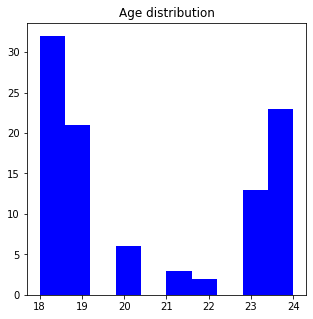

In [125]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
plt.figure(figsize=(5,5))
plt.hist(df['Age'],color='b')
plt.title("Age distribution");

C:\Users\Prayag Purani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


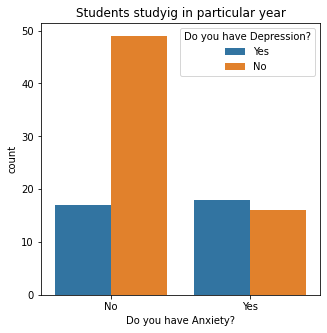

In [128]:
plt.figure(figsize=(5,5))
sns.countplot(df['Do you have Anxiety?'],hue=df['Do you have Depression?'])
plt.title("Students studyig in particular year");
plt.show()

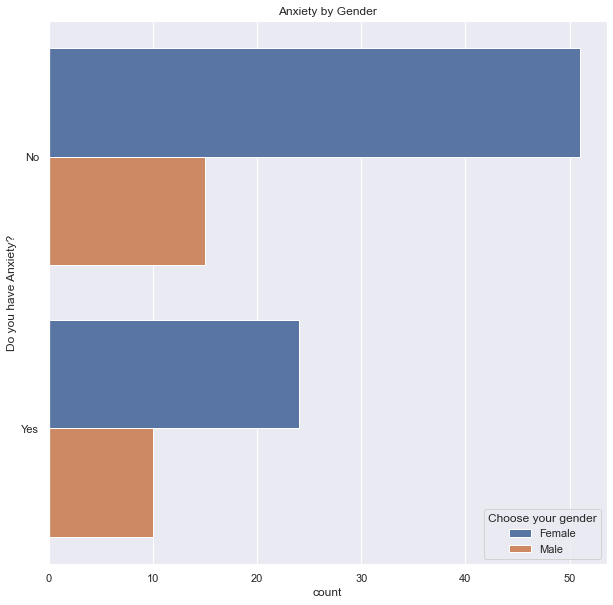

In [130]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?",hue='Choose your gender', data=df)
plt.title("Anxiety by Gender")
plt.show()

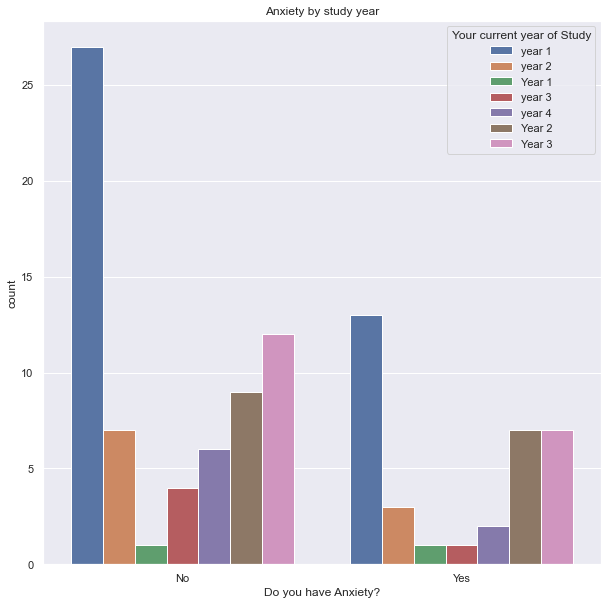

In [131]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()